In [16]:
import osmnx as ox
import geopandas as gpd

In [2]:
# or optionally buffer them
places = [
    "Cambridgeshire, UK",
    "City of Peterborough, UK",
    "Norfolk, UK",
    "Suffolk, UK",
    "Essex, UK",
    "Thurrock, UK",
    "Hertfordshire, UK",
    "Central Bedfordshire, UK",
    "Bedford, UK"
]
#places = ["Bedford, UK"]
gdf = ox.geocode_to_gdf(places, buffer_dist=500)

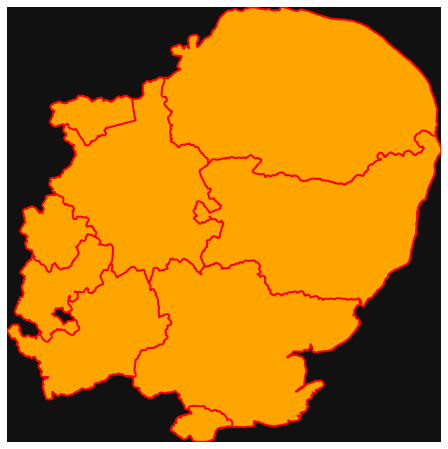

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [3]:
ox.plot_footprints(gdf, edge_linewidth=2, edge_color='red')

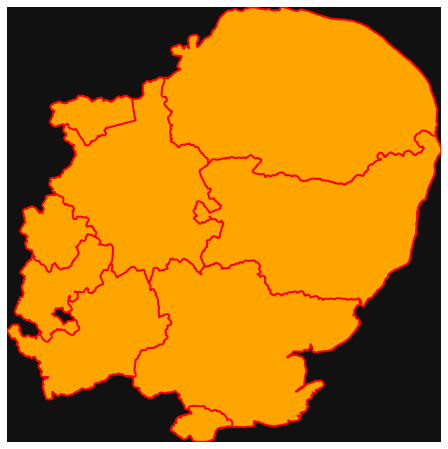

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [12]:
ox.plot_footprints(gdf, edge_linewidth=2, edge_color='red')

In [4]:
EE_geom = gdf["geometry"].unary_union

In [5]:
from utils.utils import *

In [6]:
split_geom = ox.utils_geo._quadrat_cut_geometry(EE_geom, quadrat_width=metres_to_dist(10000))

In [7]:
split_geom_gdf = gpd.GeoDataFrame({"geometry": split_geom}, crs=gdf.crs)

In [8]:
polygons = split_geom_gdf["geometry"].to_list()

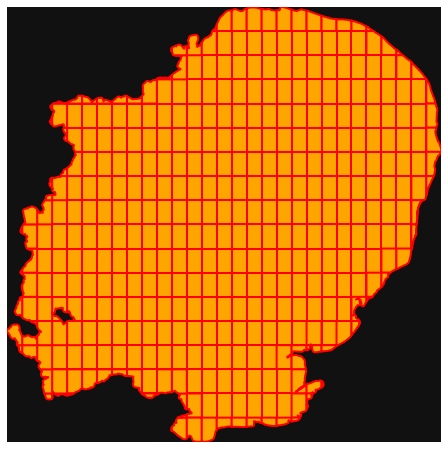

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [9]:
ox.plot_footprints(split_geom_gdf, edge_linewidth=2, edge_color='red')

In [10]:
i = 306

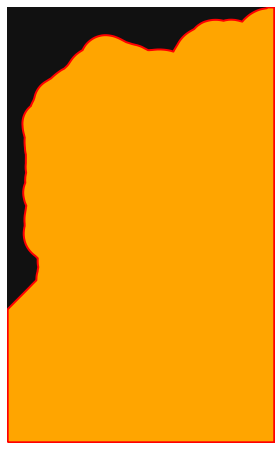

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [17]:
ox.plot_footprints(split_geom_gdf.iloc[i:i+1], edge_linewidth=2, edge_color='red')

In [14]:
G = ox.graph_from_polygon(polygons[i],
                       custom_filter='["highway"~"footway|cycleway|bridleway|path|track"]', 
                       retain_all=True, simplify=False).to_undirected()

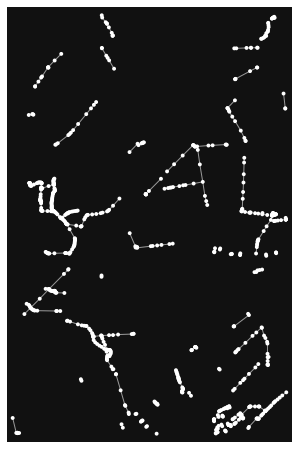

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [15]:
ox.plot_graph(G)

In [22]:
polygons[i].bounds

(0.03191907043533715, 52.65116689827188, 0.1191368378950558, 52.73740847154621)

In [18]:
row_df = pd.read_csv("data/row/row.csv")

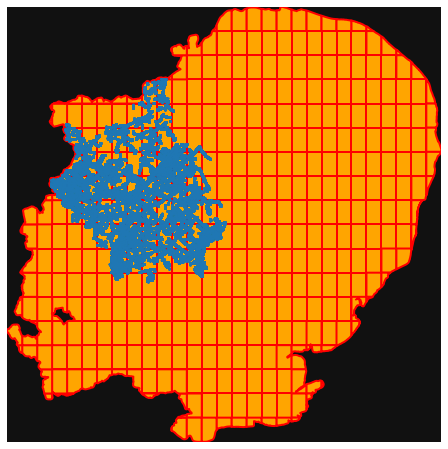

In [26]:
fig, ax = ox.plot_footprints(split_geom_gdf, edge_linewidth=2, edge_color='red', show=False, close=False)
ax.scatter(row_df["longitude"], row_df["latitude"], s=4, marker='.')

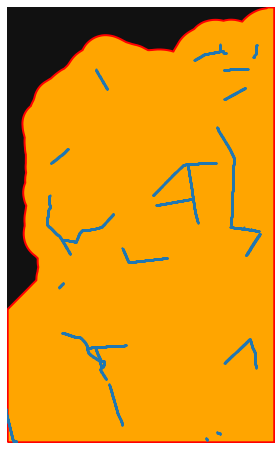

In [55]:
fig, ax = ox.plot_footprints(split_geom_gdf.iloc[i:i+1], edge_linewidth=2, edge_color='red', show=False, close=False)
ax.scatter(row_df["longitude"], row_df["latitude"], s=4, marker='.')

In [61]:
from matplotlib.path import Path
import numpy as np

In [88]:
def points_in_polygon(geometry, df):
    points = df[["longitude","latitude"]].to_numpy()
    inside = Path(geometry.boundary).contains_points(points)
    return df[inside].reset_index()

In [89]:
df = points_in_polygon(polygons[i], row_df)

c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\matplotlib\path.py:129: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = _to_unmasked_float_array(vertices)


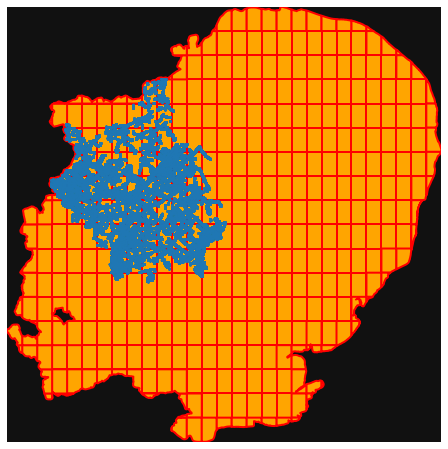

In [92]:
fig, ax = ox.plot_footprints(split_geom_gdf, edge_linewidth=2, edge_color='red', show=False, close=False)
ax.scatter(row_df["longitude"], row_df["latitude"], s=4, marker='.')

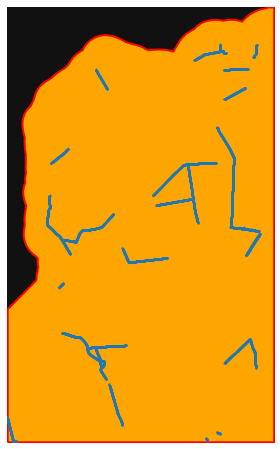

In [91]:
fig, ax = ox.plot_footprints(split_geom_gdf.iloc[i:i+1], edge_linewidth=2, edge_color='red', show=False, close=False)
ax.scatter(contained_points["longitude"], contained_points["latitude"], s=4, marker='.')